In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


3月17号下午讨论会上王晨展示的散点图的清晰轮廓引起了大家的兴趣。这里我们试图验证一下这些轮廓的左边部分是否是由观测灵敏度截断导致。背后的想法是，对于较低的$^{12}$CO强度，相应的$^{13}$CO强度也必然较低，因此相对于高$^{12}$CO强度区域，具有较低$^{12}$CO强度的区域会受到较多截断，也就是会导致图中偏左区域的包络线轮廓较低。

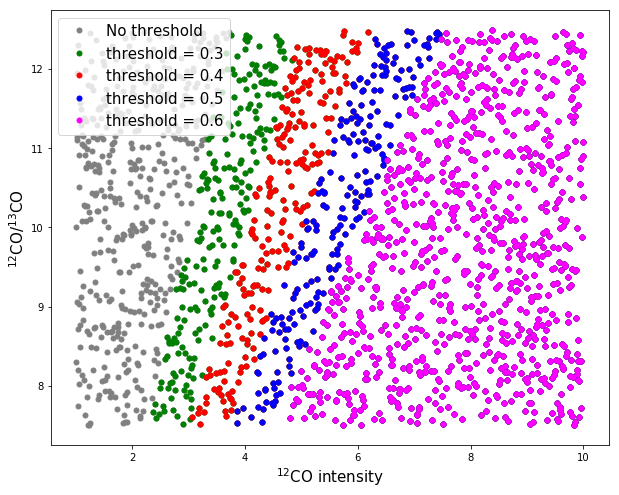

In [74]:
n = 2000 # 随机点的个数，对应于观测数据的总点数 (被筛选之前)

ratio_12_to_13_mean = 10 # 假定 12CO/13CO 比值的平均值是 10 (只是数值实验，不一定符合实际)
ratio_var = 5 # 假定 12CO/13CO 比值的大致变化幅度是 5
ratio_12_to_13 = ratio_12_to_13_mean + 5 * (rand(n) - 0.5)

min_12, max_12 = 1, 10 # 假定的 12CO 强度范围，arbitrary unit
I_12CO = linspace(min_12, max_12, num=n)
I_13CO = I_12CO / ratio_12_to_13 # 13CO 强度

figure(figsize=(10,8))

_ = plot(I_12CO, ratio_12_to_13, label='No threshold',
         marker='.', markersize=10,
         color='gray', linestyle='')
ax = gca()
ax.set_xlabel('$^{12}$CO intensity', fontsize=15)
ax.set_ylabel('$^{12}$CO/$^{13}$CO', fontsize=15)

# 下面用不同颜色画出采用不同13CO截断后的散点图
index_above_threshold = where(I_13CO > 0.3)
ax.plot(I_12CO[index_above_threshold],
        ratio_12_to_13[index_above_threshold],
        marker='o', markersize=5, label='threshold = 0.3',
        linestyle='', color='green')
index_above_threshold = where(I_13CO > 0.4)
ax.plot(I_12CO[index_above_threshold],
        ratio_12_to_13[index_above_threshold],
        marker='o', markersize=5, label='threshold = 0.4',
        linestyle='', color='red')
index_above_threshold = where(I_13CO > 0.5)
ax.plot(I_12CO[index_above_threshold],
        ratio_12_to_13[index_above_threshold],
        marker='o', markersize=5, label='threshold = 0.5',
        linestyle='', color='blue')
index_above_threshold = where(I_13CO > 0.6)
ax.plot(I_12CO[index_above_threshold],
        ratio_12_to_13[index_above_threshold],
        marker='o', markersize=5, label='threshold = 0.6',
        linestyle='', color='magenta')
_ = ax.legend(fontsize=15)